<a href="https://colab.research.google.com/github/HN-UI/25_1_AI_DL/blob/main/practice_file/AI_DL_Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. boston_housing 데이터는 numerical한 value들이 존재하는 dataset이었고, 이러한 dataset을 통해 regression problem으로 접근하여 문제 해결하고자 함.


In [1]:
# regression problem dataset
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
# small data size => cross-validation
train_data.shape

(404, 13)

In [12]:
test_data.shape

(102, 13)

In [13]:
# not categorical, numerical => regression problem
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [3]:
# normalize the data set => enhance for convergence speed
# (404, 13)에서 axis = 0 은 404. 404 쪽에 대한 평균 내기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [14]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [39]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        # regression 모델이기 때문에 output size = 1
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [40]:
def build_model2():
    model = keras.Sequential([
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        # regression 모델이기 때문에 output 차원 == 1
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

In [18]:
# k-fold cross validation
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

# 4번의 반복 수행
for i in range(k):
    print(f"Processing fold #{i}")
    # 4개로 나눈 데이터 셋 중 하나 선택하여 validation set으로 둠
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    # target data도 마찬가지로 둠
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=128, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [19]:
all_scores

[2.199188709259033, 2.795121669769287, 2.579700469970703, 2.5848071575164795]

In [20]:
np.mean(all_scores)

np.float64(2.5397045016288757)

In [42]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()

    # record every model fitting
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [ ]:
num_epochs = 300
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()

    # record every model fitting
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

In [43]:
print(len(all_mae_histories))
print(len(all_mae_histories[0]))

4
300


In [44]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

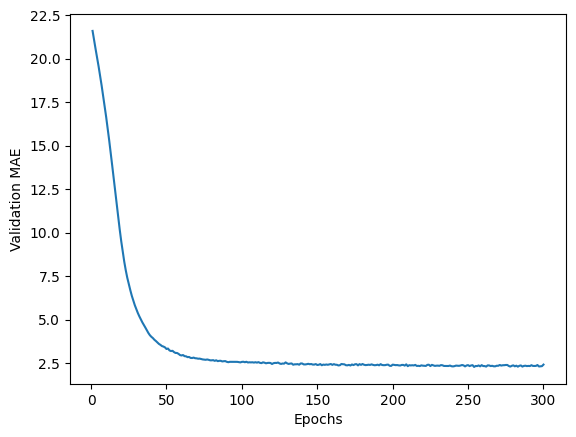

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

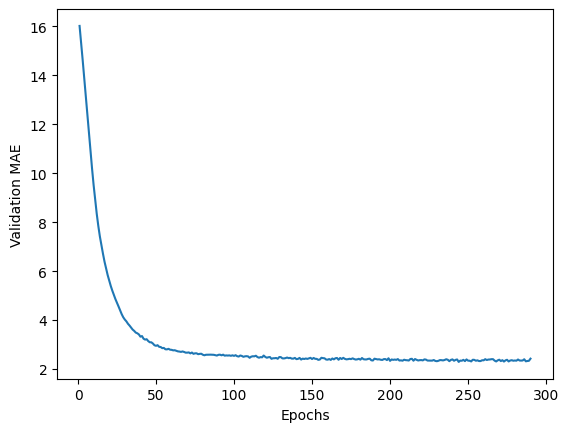

In [46]:
# 학습 초반의 불안정한 값들을 빼고 시각화
# MAE 최고점이 감소한 모습을 보여줌 (22.5 -> 16)
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [55]:
model = build_model()
history_test = model.fit(train_data, train_targets,
          epochs=300, batch_size=128, verbose=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

Epoch 1/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 593.1351 - mae: 22.5651
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 568.8643 - mae: 21.9187 
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 508.7509 - mae: 20.7224 
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 481.4908 - mae: 20.1753 
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 458.8915 - mae: 19.5536 
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 434.9567 - mae: 18.9236 
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 398.1664 - mae: 18.0162 
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 363.7227 - mae: 17.1884 
Epoch 9/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 340.1286 - mae: 16.4375 
Epoch 10/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 290.9318 - mae: 15.2218 
Epoch 11/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 274.9684 - mae: 14.7148 
Epoch 12/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 238.3146 - mae: 13.5683 
Epoch 13/300


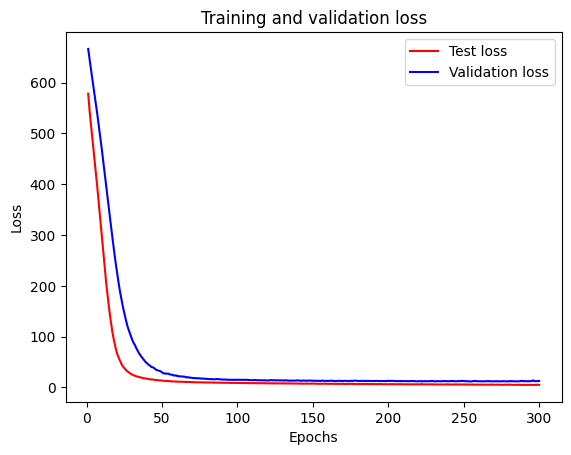

In [58]:
loss = history_test.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "r", label="Test loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [48]:
test_mae_score

2.5647008419036865

In [49]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([8.726673], dtype=float32)

---

In [73]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

# generate random normal number after 784th number
train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

# concatenate 0 after 784th number
train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

In [74]:
train_images.shape

(60000, 784)

In [75]:
train_images_with_noise_channels.shape

(60000, 1568)

In [76]:
train_images_with_zeros_channels.shape

(60000, 1568)

In [77]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),

        # 10개의 class 분류 => softmax 사용
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_ori = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6971 - loss: 1.0788 - val_accuracy: 0.9212 - val_loss: 0.2697
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9161 - loss: 0.2734 - val_accuracy: 0.9505 - val_loss: 0.1758
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9457 - loss: 0.1753 - val_accuracy: 0.9583 - val_loss: 0.1444
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9634 - loss: 0.1184 - val_accuracy: 0.9617 - val_loss: 0.1304
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9727 - loss: 0.0887 - val_accuracy: 0.9641 - val_loss: 0.1230
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0663 - val_accuracy: 0.9566 - val_loss: 0.1438
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9850 - loss: 0.0468 - val_accuracy: 0.9631 - val_loss: 0.1314
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.

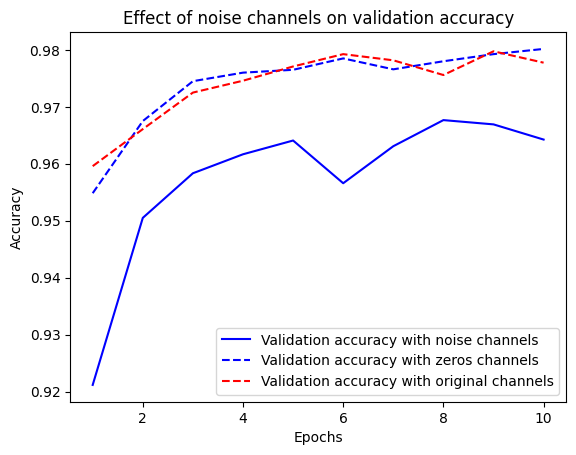

In [78]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_ori.history["val_accuracy"]

epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--",
         label="Validation accuracy with original channels")

plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [80]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
# label suffling
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1031 - loss: 2.3306 - val_accuracy: 0.1026 - val_loss: 2.3076
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1212 - loss: 2.2974 - val_accuracy: 0.1010 - val_loss: 2.3114
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1280 - loss: 2.2887 - val_accuracy: 0.0988 - val_loss: 2.3213
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1428 - loss: 2.2768 - val_accuracy: 0.0954 - val_loss: 2.3291
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1582 - loss: 2.2579 - val_accuracy: 0.0985 - val_loss: 2.3372
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1739 - loss: 2.2345 - val_accuracy: 0.0975 - val_loss: 2.3468
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1870 - loss: 2.2110 - val_accuracy: 0.0995 - val_loss: 2.3610
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2020 - loss: 2.1845 - val_accu

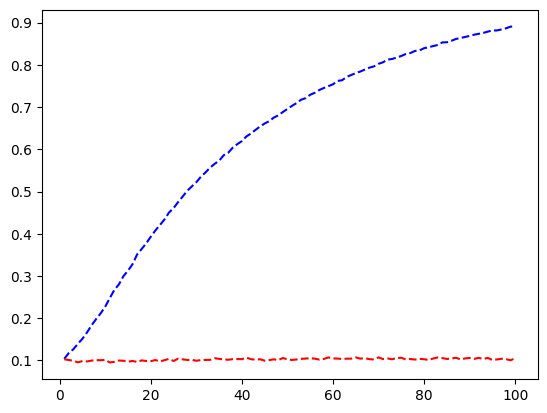

In [84]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epoches = range(1, 101)
plt.plot(epoches, acc, "b--", label = "Training accuracy with shuffled data")
plt.plot(epoches, val_acc, "r--", label = "Training accuracy with shuffled data")
plt.xlabel("Epoches")
plt.ylabel("Accuracy")

In [85]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# learning rate 수정
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4427 - loss: 2767.9055 - val_accuracy: 0.1935 - val_loss: 2.2292
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2035 - loss: 2.7659 - val_accuracy: 0.1766 - val_loss: 2.2539
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1881 - loss: 2.9812 - val_accuracy: 0.2201 - val_loss: 2.1052
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2000 - loss: 2.3503 - val_accuracy: 0.1921 - val_loss: 2.1552
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1939 - loss: 2.3011 - val_accuracy: 0.2251 - val_loss: 2.3351
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2085 - loss: 2.2569 - val_accuracy: 0.2004 - val_loss: 2.1731
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2040 - loss: 2.6352 - val_accuracy: 0.2104 - val_loss: 2.1404
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1897 - loss: 2.2991 - val_accuracy:

In [86]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
# learning rate 0.01
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8373 - loss: 0.6930 - val_accuracy: 0.9531 - val_loss: 0.1663
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9643 - loss: 0.1196 - val_accuracy: 0.9620 - val_loss: 0.1473
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9739 - loss: 0.0879 - val_accuracy: 0.9641 - val_loss: 0.1707
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9798 - loss: 0.0725 - val_accuracy: 0.9673 - val_loss: 0.1801
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9841 - loss: 0.0611 - val_accuracy: 0.9719 - val_loss: 0.1632
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9863 - loss: 0.0545 - val_accuracy: 0.9688 - val_loss: 0.2133
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9884 - loss: 0.0447 - val_accuracy: 0.9737 - val_loss: 0.1785
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9906 - loss: 0.0385 - val_accuracy: 0.

In [87]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7437 - loss: 1.0364 - val_accuracy: 0.9056 - val_loss: 0.3581
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9008 - loss: 0.3713 - val_accuracy: 0.9143 - val_loss: 0.3091
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.3246 - val_accuracy: 0.9191 - val_loss: 0.2919
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9155 - loss: 0.3085 - val_accuracy: 0.9217 - val_loss: 0.2824
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9168 - loss: 0.2963 - val_accuracy: 0.9237 - val_loss: 0.2786
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9188 - loss: 0.2870 - val_accuracy: 0.9240 - val_loss: 0.2749
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9221 - loss: 0.2827 - val_accuracy: 0.9261 - val_loss: 0.2722
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9219 - loss: 0.2784 - val_accuracy: 0.

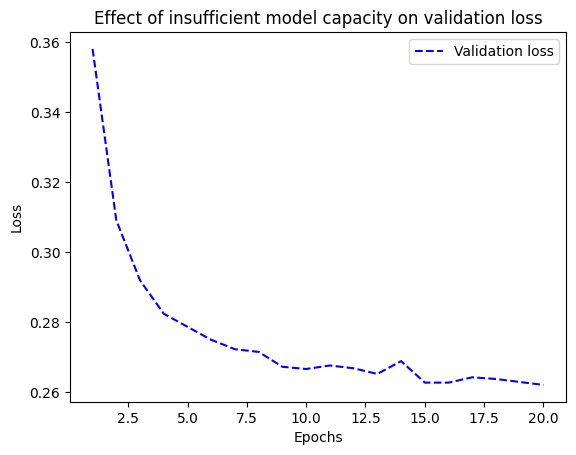

In [88]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [89]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8288 - loss: 0.6227 - val_accuracy: 0.9383 - val_loss: 0.2112
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9479 - loss: 0.1764 - val_accuracy: 0.9570 - val_loss: 0.1462
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9656 - loss: 0.1168 - val_accuracy: 0.9640 - val_loss: 0.1155
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9735 - loss: 0.0889 - val_accuracy: 0.9690 - val_loss: 0.1065
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9775 - loss: 0.0716 - val_accuracy: 0.9739 - val_loss: 0.0940
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9831 - loss: 0.0556 - val_accuracy: 0.9750 - val_loss: 0.0850
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9868 - loss: 0.0461 - val_accuracy: 0.9742 - val_loss: 0.0915
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9883 - loss: 0.0389 - val_accuracy: 0.

In [90]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6930 - loss: 0.6135 - val_accuracy: 0.8674 - val_loss: 0.4107
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8901 - loss: 0.3576 - val_accuracy: 0.8835 - val_loss: 0.3183
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9194 - loss: 0.2541 - val_accuracy: 0.8884 - val_loss: 0.2848
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9335 - loss: 0.2017 - val_accuracy: 0.8897 - val_loss: 0.2747
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9481 - loss: 0.1669 - val_accuracy: 0.8907 - val_loss: 0.2748
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9577 - loss: 0.1381 - val_accuracy: 0.8853 - val_loss: 0.2922
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9641 - loss: 0.1205 - val_accuracy: 0.8848 - val_loss: 0.2953
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accura

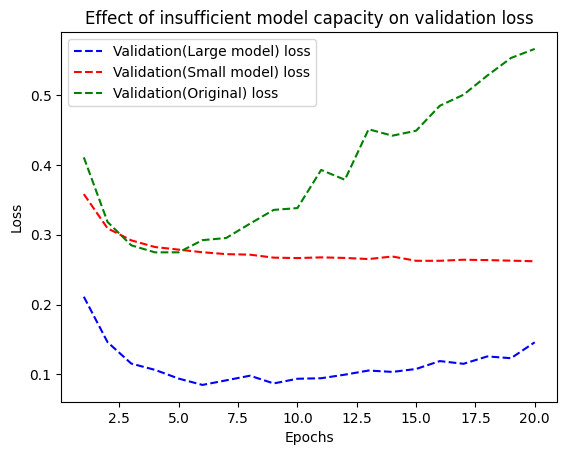

In [104]:
val_large_loss = history_large_model.history["val_loss"]
val_small_loss = history_small_model.history["val_loss"]
val_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_large_loss, "b--",
         label="Validation(Large model) loss")
plt.plot(epochs, val_small_loss, "r--",
         label="Validation(Small model) loss")
plt.plot(epochs, val_original, "g--",
         label="Validation(Original) loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [91]:
model = keras.Sequential([
    # lower capacity
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - accuracy: 0.6913 - loss: 0.6117 - val_accuracy: 0.8544 - val_loss: 0.4504
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8868 - loss: 0.3980 - val_accuracy: 0.8778 - val_loss: 0.3631
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9169 - loss: 0.3023 - val_accuracy: 0.8733 - val_loss: 0.3341
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9299 - loss: 0.2476 - val_accuracy: 0.8867 - val_loss: 0.2967
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9422 - loss: 0.2068 - val_accuracy: 0.8892 - val_loss: 0.2852
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9486 - loss: 0.1823 - val_accuracy: 0.8903 - val_loss: 0.2764
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9578 - loss: 0.1544 - val_accuracy: 0.8894 - val_loss: 0.2757
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9650 - loss: 0.1347 - val_accuracy: 0.8837 - 

In [92]:
model = keras.Sequential([
    # higher capacity
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.6602 - loss: 0.6451 - val_accuracy: 0.7945 - val_loss: 0.4424
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8718 - loss: 0.3277 - val_accuracy: 0.8881 - val_loss: 0.2867
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9221 - loss: 0.2159 - val_accuracy: 0.8899 - val_loss: 0.2680
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9412 - loss: 0.1670 - val_accuracy: 0.8872 - val_loss: 0.2676
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9535 - loss: 0.1333 - val_accuracy: 0.8780 - val_loss: 0.3161
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9668 - loss: 0.0963 - val_accuracy: 0.8856 - val_loss: 0.3026
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9800 - loss: 0.0664 - val_accuracy: 0.8849 - val_loss: 0.3309
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9897 - loss: 0.0406 - val_accuracy: 0.8825 - v

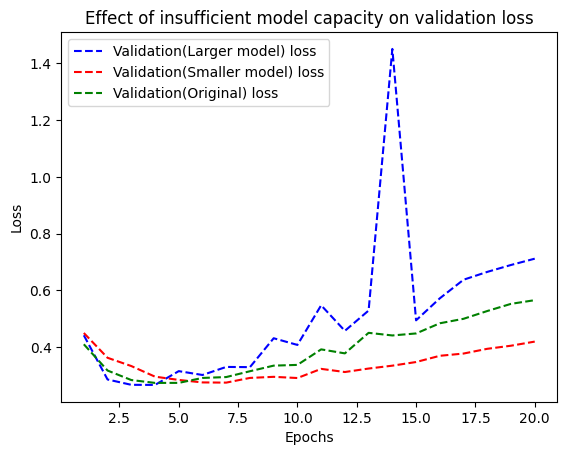

In [103]:
val_high_loss = history_larger_model.history["val_loss"]
val_low_loss = history_smaller_model.history["val_loss"]
val_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_high_loss, "b--",
         label="Validation(Larger model) loss")
plt.plot(epochs, val_low_loss, "r--",
         label="Validation(Smaller model) loss")
plt.plot(epochs, val_original, "g--",
         label="Validation(Original) loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [93]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    # 각 layer에 l2 정규화 도입
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.6840 - loss: 0.6901 - val_accuracy: 0.8682 - val_loss: 0.4774
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8978 - loss: 0.4222 - val_accuracy: 0.8795 - val_loss: 0.4066
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9170 - loss: 0.3429 - val_accuracy: 0.8800 - val_loss: 0.3814
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9321 - loss: 0.2946 - val_accuracy: 0.8878 - val_loss: 0.3577
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9401 - loss: 0.2658 - val_accuracy: 0.8888 - val_loss: 0.3521
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9425 - loss: 0.2562 - val_accuracy: 0.8725 - val_loss: 0.3897
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9415 - loss: 0.2474 - val_accuracy: 0.8689 - val_loss: 0.4017
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9481 - loss: 0.2361 - val_accuracy: 0.8858 - 

In [94]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

In [111]:
model = keras.Sequential([
    # dropout 적용
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout_5 = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5514 - loss: 0.6780 - val_accuracy: 0.8259 - val_loss: 0.5889
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6947 - loss: 0.5813 - val_accuracy: 0.8649 - val_loss: 0.4749
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7833 - loss: 0.4903 - val_accuracy: 0.8750 - val_loss: 0.3978
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8338 - loss: 0.4206 - val_accuracy: 0.8817 - val_loss: 0.3412
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8611 - loss: 0.3702 - val_accuracy: 0.8866 - val_loss: 0.3112
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8811 - loss: 0.3376 - val_accuracy: 0.8866 - val_loss: 0.2933
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8964 - loss: 0.2995 - val_accuracy: 0.8893 - val_loss: 0.2886
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9076 - loss: 0.2657 - val_accuracy: 0.8852 - 

In [117]:
model = keras.Sequential([
    # dropout 적용
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.8),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

history_dropout_2 = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.5382 - loss: 0.6831 - val_accuracy: 0.8091 - val_loss: 0.5946
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6724 - loss: 0.6014 - val_accuracy: 0.8470 - val_loss: 0.4917
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7340 - loss: 0.5414 - val_accuracy: 0.8713 - val_loss: 0.4319
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7737 - loss: 0.4952 - val_accuracy: 0.8777 - val_loss: 0.3928
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8075 - loss: 0.4588 - val_accuracy: 0.8774 - val_loss: 0.3589
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8261 - loss: 0.4313 - val_accuracy: 0.8851 - val_loss: 0.3417
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8455 - loss: 0.4012 - val_accuracy: 0.8900 - val_loss: 0.3135
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8597 - loss: 0.3780 - val_accuracy: 0.8875 - 

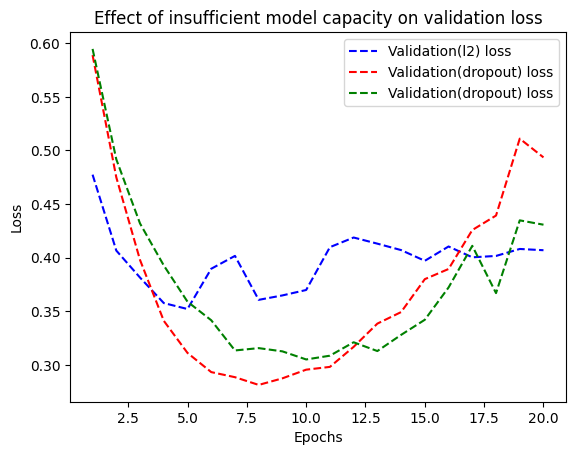

In [118]:
val_l2_loss = history_l2_reg.history["val_loss"]
val_dropout_5_loss = history_dropout_5.history["val_loss"]
val_dropout_2_loss = history_dropout_2.history["val_loss"]
val_original = history_original.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_l2_loss, "b--",
         label="Validation(l2) loss")
plt.plot(epochs, val_dropout_5_loss
, "r--", label="Validation(dropout) loss")
plt.plot(epochs, val_dropout_2_loss
, "g--", label="Validation(dropout) loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()